# Imports

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score

from sklearn.model_selection import train_test_split

# Load Data

In [16]:
data = pd.read_csv("data/data_cleaned.csv")

# Data Preparation

In [17]:
# one hot
data = pd.get_dummies(data, prefix = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"], columns = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"])

In [18]:
# split
x_data = data.drop(["PRICE"], axis=1)
y_data = data["PRICE"]

In [19]:
# normalization
x_data = x_data.astype(float)
x_data = x_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [20]:
# train & test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Linear Regression

Score: -4.76812074805e+19
R2 Score: -4.76812074805e+19
Mean squared error: 1.73688976638e+31


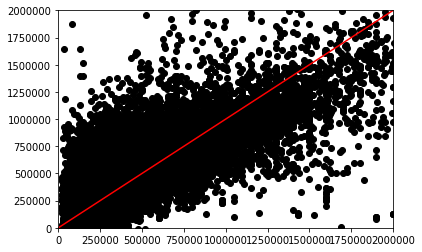

In [21]:
linreg = LinearRegression(n_jobs = -1)
linreg.fit(x_train, y_train)

y_pred_lin = linreg.predict(x_test)

lin_score = linreg.score(x_test, y_test)
lin_msqe = mean_squared_error(y_test, y_pred_lin)

print("Score: " + str(lin_score))
print("R2 Score: " + str(r2_score(y_test, y_pred_lin)))
print("Mean squared error: " + str(lin_msqe))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lin, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
plt.xlim(0, 2000000)
plt.ylim(0, 2000000)
ax.add_line(line)
plt.show()

# Logistic Regression

In [ ]:
logreg = LogisticRegression(n_jobs=-1, solver="sag")
logreg.fit(x_train, y_train)

y_pred_log = logreg.predict(x_test)

lin_score = linreg.score(x_test, y_test)
lin_msqe = mean_squared_error(y_test, y_pred_log)

print("Score: " + str(log_score))
print("R2 Score: " + str(r2_score(y_test, y_pred_log)))
print("Mean squared error: " + str(log_msqe))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_log, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
plt.xlim(0, 2000000)
plt.ylim(0, 2000000)
ax.add_line(line)
plt.show()

C:\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
